# Predicting High-Value Customers
*Retail loyalty campaign – July 2025*
- The marketing team needs to target big-spender customers to lift Q3 revenue by ≈ SAR 1 M.

In [57]:
import pandas as pd
# Load the marketing campaign data from a tab-separated CSV file
df = pd.read_csv('marketing_campaign.csv', sep ='\t')
# Display the first 5 rows of the dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [58]:
# Check for missing values in each column
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [68]:
# Remove rows with missing income, as imputation might distort the signal for high-value customers
df = df.dropna(subset=['Income'])

In [60]:
# Calculate the total spending for each customer across all product categories
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [61]:
# Added a new column to indicate if a customer is 'valuable' based on total spending above the median
df['valuable_costumer'] = df['total_spending'].apply(lambda x : 1 if x > df['total_spending'].median() else 0) # this is my formula for a valuable customer could be anything really

In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Select features for the model (excluding total_spending to avoid data leakage)
x = df[['Income','Kidhome','Marital_Status','Education','Year_Birth','NumWebVisitsMonth']]
y= df['valuable_costumer']

x = pd.get_dummies(x) # did this for string complications

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
lrmodel = LogisticRegression()
knmodel = KNeighborsClassifier()
rfmodel = RandomForestClassifier()

# Train the models on the training data
lrmodel.fit(x_train, y_train)
knmodel.fit(x_train, y_train)
rfmodel.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
# Make predictions on the test set using each trained model
y1_pred = lrmodel.predict(x_test)
y2_pred = knmodel.predict(x_test)
y3_pred = rfmodel.predict(x_test)

In [65]:
from sklearn.metrics import classification_report
# Print classification reports for each model to evaluate performance metrics like precision, recall, and f1-score
print(classification_report(y_test, y1_pred))
print(classification_report(y_test, y2_pred))
print(classification_report(y_test, y3_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       221
           1       0.89      0.89      0.89       223

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       221
           1       0.90      0.90      0.90       223

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       221
           1       0.93      0.90      0.92       223

    accuracy                           0.92       444
   macro avg       0.92      0.92      0.92       444
weighted avg       0.92      0.92      0.92       444



In [66]:
from sklearn.metrics import confusion_matrix
# Print confusion matrices for each model to show true positives, true negatives, false positives, and false negatives
print(confusion_matrix(y_test, y1_pred))
print(confusion_matrix(y_test, y2_pred))
print(confusion_matrix(y_test, y3_pred))

[[196  25]
 [ 24 199]]
[[200  21]
 [ 23 200]]
[[206  15]
 [ 22 201]]


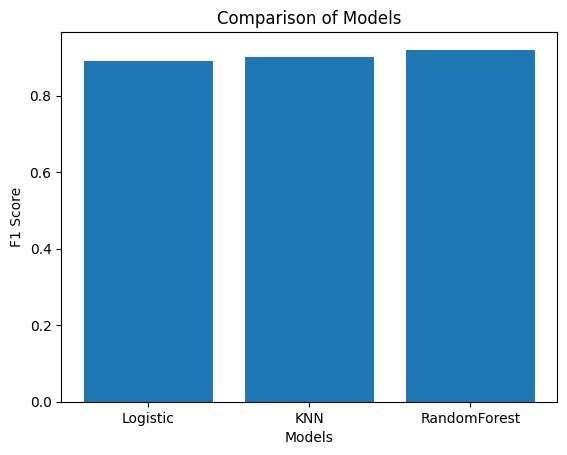

In [67]:
import matplotlib.pyplot as plt

# Prepare data for plotting model comparison
models = ['Logistic','KNN','RandomForest']
f1_scores = [0.89,0.90,0.92] # These scores should be updated after re-running with corrected features
plt.bar(models, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Models')
plt.show()

# key takeaway
- Use RandomForest: it gives the best F1 (~0.92) and should deliver the most uplift.
- Skip extra tuning: all models are already strong (≥0.89 F1); further tweaking won’t make a difference.
- Keep Logistic Regression handy: nearly as accurate but easier to explain if stakeholders ask, “How does it work?